In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import os

| ID |      TTS/VC      |  Description |
|-----|:-------------:|------:|
|A01|TTS|neural waveform model|
|A02|TTS|vocoder|
|A03|TTS|vocoder|
|A04|TTS|waveform concatenation|
|A05|VC|vocoder|
|A06|VC|spectral filtering|
|A07|TTS|vocoder+GAN|
|A08|TTS|neural waveform|
|A09|TTS|vocoder|
|A10|TTS|neural waveform|
|A11|TTS|griffin lim|
|A12|TTS|neural waveform|
|A13|TTS_VC|waveform concatenation+waveform filtering|
|A14|TTS_VC|vocoder|
|A15|TTS_VC|neural waveform|
|A16|TTS|waveform concatenation|
|A17|VC|waveform filtering|
|A18|VC|vocoder|
|A19|VC|spectral filtering|


In [2]:
lpc_lengths = np.arange(1, 51)


### Check system type

In [4]:
for l in lpc_lengths:
    eval_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/eval_LPC_' + str(l) +'.pkl')
    #eval_features.drop('coeff', axis=1, inplace=True)
    eval_features.dropna(inplace=True)
    
    print(eval_features['system_id'].unique())
    break

['A11' 'A14' 'A16' 'A09' 'A13' '-' 'A12' 'A18' 'A15' 'A08' 'A17' 'A10'
 'A07' 'A19']


In [8]:
for l in lpc_lengths:
    dev_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/dev_LPC_' + str(l) +'.pkl')
    #dev_features.drop('coeff', axis=1, inplace=True)
    dev_features.dropna(inplace=True)
    
    print(dev_features['system_id'].unique())
    break

['-' 'A01' 'A02' 'A03' 'A04' 'A05' 'A06']


In [10]:
for l in lpc_lengths:
    train_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/train_LPC_' + str(l) +'.pkl')
    #train_features.drop('coeff', axis=1, inplace=True)
    train_features.dropna(inplace=True)
    
    print(train_features['system_id'].unique())
    break

['-' 'A01' 'A02' 'A03' 'A04' 'A05' 'A06']


### Create one dataframe for each bot in dev

In [11]:
X_dev_bonafide_list = []
X_dev_spoof_list = []


dev_bot_systems = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06']

dest_folder = '/nas/home/cborrelli/bot_speech/features/bot'

for l in lpc_lengths:
    dev_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/dev_LPC_' + str(l) +'.pkl')
    #dev_features.drop('coeff', axis=1, inplace=True)
    #dev_features.dropna(inplace=True)
    
    dev_spoof_features= dev_features[dev_features['label']=='spoof']

    for b in dev_bot_systems:
        
        dev_bot_spoof_features = dev_spoof_features[dev_features['system_id'] == b]
        
        dest_filename = 'dev_LPC_'+ str(l)+'_bot_'+str(b)+'.pkl'
        dev_bot_spoof_features.to_pickle(os.path.join(dest_folder, dest_filename))



/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/nas/home/cborrelli/miniconda/lib/python

### Extract train features for testing

In [12]:
X_train_bonafide_list = []
X_train_spoof_list = []
max_lpc_order = 50
lpc_lengths = np.arange(1, max_lpc_order + 1)


for l in lpc_lengths:
    train_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/train_LPC_' + str(l) +'.pkl')
    #train_features.drop('coeff', axis=1, inplace=True)
    train_features.dropna(inplace=True)
    
    train_bonafide_features = train_features[train_features['label']=='bonafide']
    train_spoof_features = train_features[train_features['label']=='spoof']
    
    if l==1:
        train_spoof_features = train_features[train_features['label']=='spoof'].sample(
            n=train_bonafide_features.shape[0])
        selected_files = train_spoof_features['audio_filename']
    else:
        train_spoof_features = train_spoof_features[train_spoof_features['audio_filename'].isin(selected_files)]
    
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_res_mean']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_res_max']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_res_min']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_res_var']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_gain_max']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_gain_min']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_gain_mean']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['lpc_gain_var']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_res_mean']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_res_max']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_res_min']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_res_var']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_gain_max']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_gain_min']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_gain_mean']).reshape((-1, 1)))
    X_train_bonafide_list.append(np.array(train_bonafide_features['ltp_gain_var']).reshape((-1, 1)))


    X_train_spoof_list.append(np.array(train_spoof_features['lpc_res_mean']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_res_max']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_res_min']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_res_var']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_gain_max']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_gain_min']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_gain_mean']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['lpc_gain_var']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_res_mean']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_res_max']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_res_min']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_res_var']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_gain_max']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_gain_min']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_gain_mean']).reshape((-1, 1)))
    X_train_spoof_list.append(np.array(train_spoof_features['ltp_gain_var']).reshape((-1, 1)))


X_train_bonafide = np.concatenate(X_train_bonafide_list, axis=1)
X_train_spoof = np.concatenate(X_train_spoof_list, axis=1)
X_train = np.concatenate((X_train_bonafide, X_train_spoof), axis=0)

y_train_bonafide = np.ones((X_train_bonafide.shape[0],))
y_train_spoof = np.zeros((X_train_spoof.shape[0],))

y_train = np.concatenate((y_train_bonafide, y_train_spoof), axis=0)

### Extract dev features

In [14]:
X_dev_bonafide_list = []
X_dev_spoof_list = []

dev_bot_systems = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06']

lpc_lengths = np.arange(1, 51)

dev_bot_features = []

for b in dev_bot_systems:
    X_dev_spoof_list = []
    selected_files = []
    for l in lpc_lengths:
        dev_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/bot/dev_LPC_' + 
                                      str(l) +'_bot_'+ str(b) +'.pkl')

        #dev_features.drop('coeff', axis=1, inplace=True)

        dev_features.dropna(inplace=True)

        dev_bonafide_features = dev_features[dev_features['label']=='bonafide']
        dev_spoof_features = dev_features[dev_features['label']=='spoof']
        
        #if l==1:
        #    dev_spoof_features = dev_features[dev_features['label']=='spoof'].sample(
        #        n=dev_bonafide_features.shape[0])
        #    selected_files = dev_spoof_features['audio_filename']
        #else:
        #    dev_spoof_features = dev_spoof_features[dev_spoof_features['audio_filename'].isin(selected_files)]
    
        
        X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_res_mean']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_res_max']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_res_min']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_res_var']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_gain_max']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_gain_min']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_gain_mean']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['lpc_gain_var']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_res_mean']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_res_max']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_res_min']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_res_var']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_gain_max']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_gain_min']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_gain_mean']).reshape((-1, 1)))
        X_dev_spoof_list.append(np.array(dev_spoof_features['ltp_gain_var']).reshape((-1, 1)))
    X_dev_spoof = np.concatenate(X_dev_spoof_list, axis=1)
    y_dev_spoof = np.zeros((X_dev_spoof.shape[0],))

    dev_bot_features.append({'bot': b, 'X_dev_spoof': X_dev_spoof, 'y_dev_spoof': y_dev_spoof})

    


In [15]:
for l in lpc_lengths:
    dev_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/dev_LPC_' + str(l) +'.pkl')
    #dev_features.drop('coeff', axis=1, inplace=True)
    dev_features.dropna(inplace=True)  
    
    dev_bonafide_features = dev_features[dev_features['label']=='bonafide']
    
    
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_res_mean']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_res_max']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_res_min']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_res_var']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_gain_max']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_gain_min']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_gain_mean']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['lpc_gain_var']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_res_mean']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_res_max']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_res_min']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_res_var']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_gain_max']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_gain_min']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_gain_mean']).reshape((-1, 1)))
    X_dev_bonafide_list.append(np.array(dev_bonafide_features['ltp_gain_var']).reshape((-1, 1)))
    

X_dev_bonafide = np.concatenate(X_dev_bonafide_list, axis=1)
y_dev_bonafide = np.ones((X_dev_bonafide.shape[0],))


In [16]:
dev_bot_lengths = np.zeros((len(dev_bot_systems)))
for i, b in enumerate(dev_bot_features):
    dev_bot_lengths[i] = b['X_dev_spoof'].shape[0]
    

### Train on train and test on dev bot by bot

In [17]:
clf = RandomForestClassifier(n_estimators=20, class_weight='balanced')
#clf = SVC()
clf.fit(X_train, y_train)  

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

In [18]:
def obtain_asv_error_rates(tar_asv, non_asv, spoof_asv, asv_threshold):

    # False alarm and miss rates for ASV
    Pfa_asv = sum(non_asv >= asv_threshold) / non_asv.size
    Pmiss_asv = sum(tar_asv < asv_threshold) / tar_asv.size

    # Rate of rejecting spoofs in ASV
    if spoof_asv.size == 0:
        Pmiss_spoof_asv = None
    else:
        Pmiss_spoof_asv = np.sum(spoof_asv < asv_threshold) / spoof_asv.size

    return Pfa_asv, Pmiss_asv, Pmiss_spoof_asv


def compute_det_curve(target_scores, nontarget_scores):

    n_scores = target_scores.size + nontarget_scores.size
    all_scores = np.concatenate((target_scores, nontarget_scores))
    labels = np.concatenate((np.ones(target_scores.size), np.zeros(nontarget_scores.size)))

    # Sort labels based on scores
    indices = np.argsort(all_scores, kind='mergesort')
    labels = labels[indices]

    # Compute false rejection and false acceptance rates
    tar_trial_sums = np.cumsum(labels)
    nontarget_trial_sums = nontarget_scores.size - (np.arange(1, n_scores + 1) - tar_trial_sums)
     # false rejection rates
    frr = np.concatenate((np.atleast_1d(0), tar_trial_sums / target_scores.size)) 
    # false acceptance rates
    far = np.concatenate((np.atleast_1d(1), nontarget_trial_sums / nontarget_scores.size)) 
    # Thresholds are the sorted scores
    thresholds = np.concatenate((np.atleast_1d(all_scores[indices[0]] - 0.001), all_scores[indices]))  

    return frr, far, thresholds

def compute_eer(target_scores, nontarget_scores):
    """ Returns equal error rate (EER) and the corresponding threshold. """
    frr, far, thresholds = compute_det_curve(target_scores, nontarget_scores)
    abs_diffs = np.abs(frr - far)
    min_index = np.argmin(abs_diffs)
    eer = np.mean((frr[min_index], far[min_index]))
    return eer, thresholds[min_index]


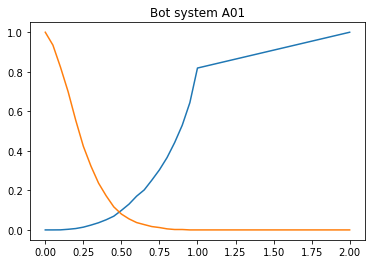

(0.09878833588640694, 0.45)


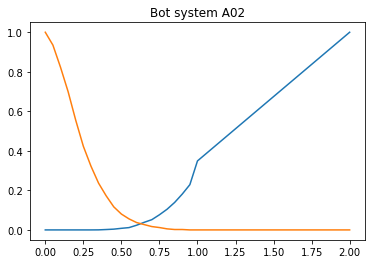

(0.03728107428463426, 0.6)


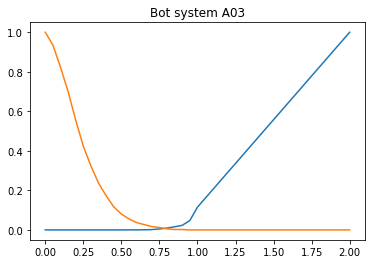

(0.00947494555077634, 0.75)


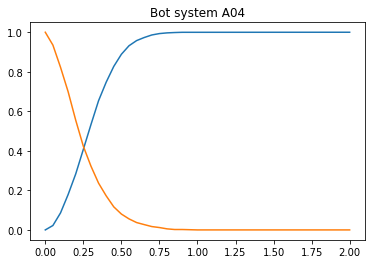

(0.4232716265069234, 0.25)


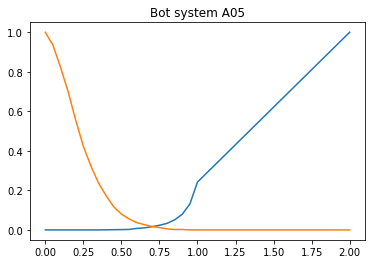

(0.016937369173327412, 0.7)


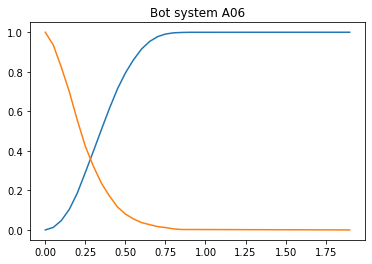

(0.39752874482000883, 0.25)


In [19]:
for b in dev_bot_systems:
    X_dev_spoof = [d['X_dev_spoof'] for d in dev_bot_features if d['bot'] == b][0]
    y_dev_spoof = [d['y_dev_spoof'] for d in dev_bot_features if d['bot'] == b][0]
    
    X_dev = np.concatenate((X_dev_bonafide, X_dev_spoof), axis=0)
    y_dev = np.concatenate((y_dev_bonafide, y_dev_spoof), axis=0)
    
    
    y_dev_hat = clf.predict_proba(X_dev)[:, 0]

    
    target_score = y_dev_hat[np.where(y_dev==0)]
    nontarget_score = y_dev_hat[np.where(y_dev==1)]

    
    [fpr, tpr, th] = roc_curve(y_dev, y_dev_hat, pos_label=0)
    fnr = 1-tpr
    
    plt.figure()
    plt.title('Bot system %s' %b)
    plt.plot(th, fnr)
    plt.plot(th, fpr)
    #plt.plot(th, np.abs(fnr-fpr))
    plt.show()

    print(compute_eer(target_score, nontarget_score))

    
    

## Train on train and dev, test on eval

### Extract dev features

In [20]:
X_dev_for_train_bonafide_list = []
X_dev_for_train_spoof_list = []

for l in lpc_lengths:
    dev_for_train_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/dev_LPC_' + str(l) +'.pkl')
    #dev_for_train_features.drop('coeff', axis=1, inplace=True)

    dev_for_train_features.dropna(inplace=True)
    
    
    dev_for_train_bonafide_features= dev_for_train_features[dev_for_train_features['label']=='bonafide']
    dev_for_train_spoof_features= dev_for_train_features[dev_for_train_features['label']=='spoof']
    
    if l==1:
        dev_for_train_spoof_features = dev_for_train_features[dev_for_train_features['label']=='spoof'].sample(n=dev_for_train_bonafide_features.shape[0])
        selected_files = dev_for_train_spoof_features['audio_filename']
    else:
        dev_for_train_spoof_features = dev_for_train_spoof_features[dev_for_train_spoof_features['audio_filename'].isin(selected_files)]
    

    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['lpc_res_mean']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['lpc_res_max']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['lpc_res_min']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['lpc_res_var']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['lpc_gain_max']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['lpc_gain_min']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['lpc_gain_mean']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['lpc_gain_var']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['ltp_res_mean']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['ltp_res_max']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['ltp_res_min']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['ltp_res_var']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['ltp_gain_max']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['ltp_gain_min']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['ltp_gain_mean']).reshape((-1, 1)))
    X_dev_for_train_bonafide_list.append(np.array(dev_for_train_bonafide_features['ltp_gain_var']).reshape((-1, 1)))

    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['lpc_res_mean']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['lpc_res_max']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['lpc_res_min']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['lpc_res_var']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['lpc_gain_max']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['lpc_gain_min']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['lpc_gain_mean']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['lpc_gain_var']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['ltp_res_mean']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['ltp_res_max']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['ltp_res_min']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['ltp_res_var']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['ltp_gain_max']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['ltp_gain_min']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['ltp_gain_mean']).reshape((-1, 1)))
    X_dev_for_train_spoof_list.append(np.array(dev_for_train_spoof_features['ltp_gain_var']).reshape((-1, 1)))



In [21]:
X_dev_for_train_bonafide = np.concatenate(X_dev_for_train_bonafide_list, axis=1)
X_dev_for_train_spoof = np.concatenate(X_dev_for_train_spoof_list, axis=1)
X_dev_for_train = np.concatenate((X_dev_for_train_bonafide, X_dev_for_train_spoof), axis=0)

y_dev_for_train_bonafide = np.ones((X_dev_for_train_bonafide.shape[0],))
y_dev_for_train_spoof = np.zeros((X_dev_for_train_spoof.shape[0],))

y_dev_for_train = np.concatenate((y_dev_for_train_bonafide, y_dev_for_train_spoof), axis=0)

### Create one dataframe for each bot in eval

In [23]:
lpc_lengths = np.arange(1, 51)

bot_systems = ['A11', 'A14', 'A16', 'A09', 'A13', 'A12', 'A18', 'A15', 'A08',
       'A17', 'A10', 'A07', 'A19']

dest_folder = '/nas/home/cborrelli/bot_speech/features/bot'

for l in lpc_lengths:
    eval_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/eval_LPC_' + str(l) +'.pkl')
    #eval_features.drop('coeff', axis=1, inplace=True)
    eval_features.dropna(inplace=True)
    eval_spoof_features= eval_features[eval_features['label']=='spoof']

    for b in bot_systems:
        
        eval_bot_spoof_features = eval_spoof_features[eval_features['system_id'] == b]
        
        dest_filename = 'eval_LPC_'+ str(l)+'_bot_'+str(b)+'.pkl'
        eval_bot_spoof_features.to_pickle(os.path.join(dest_folder, dest_filename))




/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/ip

/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/nas/home/cborrelli/miniconda/lib/python3.7/site-packages/ip

In [24]:
X_eval_bonafide_list = []

for l in lpc_lengths:
    eval_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/eval_LPC_' + str(l) +'.pkl')
    #eval_features.drop('coeff', axis=1, inplace=True)
    eval_features.dropna(inplace=True)
    
    eval_bonafide_features = eval_features[eval_features['label']=='bonafide']
    
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_res_mean']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_res_max']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_res_min']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_res_var']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_gain_max']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_gain_min']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_gain_mean']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['lpc_gain_var']).reshape((-1, 1)))
    
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_res_mean']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_res_max']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_res_min']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_res_var']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_gain_max']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_gain_min']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_gain_mean']).reshape((-1, 1)))
    X_eval_bonafide_list.append(np.array(eval_bonafide_features['ltp_gain_var']).reshape((-1, 1)))

    
X_eval_bonafide = np.concatenate(X_eval_bonafide_list, axis=1)
y_eval_bonafide = np.ones((X_eval_bonafide.shape[0],))

bonafide_length = X_eval_bonafide.shape[0]

In [ ]:
bonafide_length

In [25]:
X_eval_bonafide_list = []
X_eval_spoof_list = []

eval_bot_systems = ['A11', 'A14', 'A16', 'A09', 'A13', 'A12', 'A18', 'A15', 'A08',
       'A17', 'A10', 'A07', 'A19']


lpc_lengths = np.arange(1, 51)

eval_bot_features = []

for b in eval_bot_systems:
    X_eval_spoof_list = []
    selected_files = []
    for l in lpc_lengths:
        eval_features = pd.read_pickle('/nas/home/cborrelli/bot_speech/features/bot/eval_LPC_' + str(l) +'_bot_'+ str(b) +'.pkl')
        #eval_features.drop('coeff', axis=1, inplace=True)
        eval_features.dropna(inplace=True)
        
        
        X_eval_spoof_list.append(np.array(eval_features['lpc_res_mean']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['lpc_res_max']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['lpc_res_min']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['lpc_res_var']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['lpc_gain_max']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['lpc_gain_min']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['lpc_gain_mean']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['lpc_gain_var']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['ltp_res_mean']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['ltp_res_max']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['ltp_res_min']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['ltp_res_var']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['ltp_gain_max']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['ltp_gain_min']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['ltp_gain_mean']).reshape((-1, 1)))
        X_eval_spoof_list.append(np.array(eval_features['ltp_gain_var']).reshape((-1, 1)))

    X_eval_spoof = np.concatenate(X_eval_spoof_list, axis=1)
    y_eval_spoof = np.zeros((X_eval_spoof.shape[0],))

    eval_bot_features.append({'bot': b, 'X_eval_spoof': X_eval_spoof, 'y_eval_spoof': y_eval_spoof})

### Train on both train and dev, test on eval

In [26]:
X_bonafide = np.concatenate((X_train_bonafide, X_dev_for_train_bonafide), axis=0)
X_spoof = np.concatenate((X_train_spoof, X_dev_for_train_spoof), axis=0)
                
X = np.concatenate((X_bonafide, X_spoof), axis=0)

In [27]:
y_bonafide = np.ones([X_bonafide.shape[0],])
y_spoof = np.zeros([X_spoof.shape[0],])

y = np.concatenate((y_bonafide, y_spoof), axis=0)


In [28]:
clf2 = RandomForestClassifier(n_estimators=20, class_weight='balanced')
clf2.fit(X, y)  

RandomForestClassifier(bootstrap=True, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=20, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

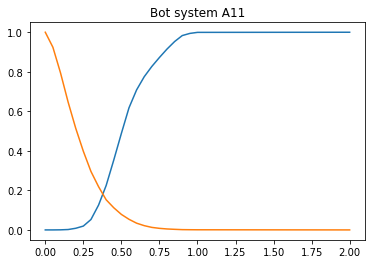

(0.21873976751800916, 0.35)


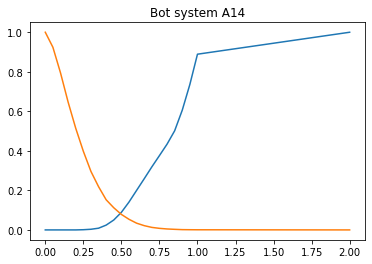

(0.08894825369716988, 0.45)


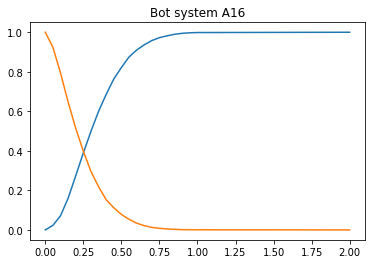

(0.3979153574209894, 0.25)


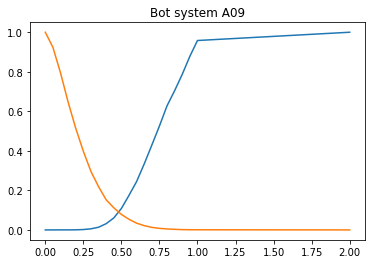

(0.10840209563007541, 0.45)


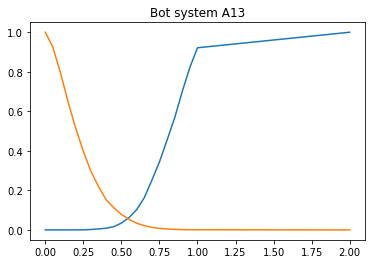

(0.06223768060386523, 0.5)


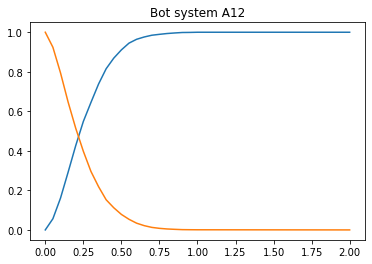

(0.5141772349221312, 0.2)


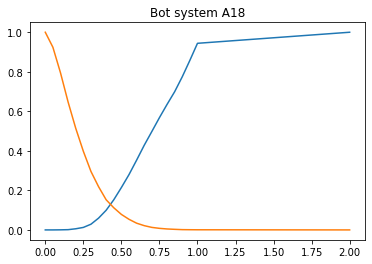

(0.15245685240379014, 0.4)


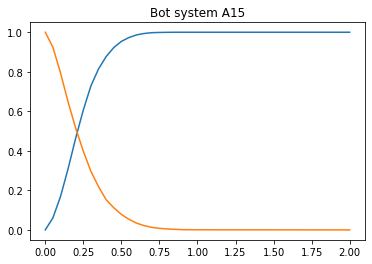

(0.5142095563960837, 0.2)


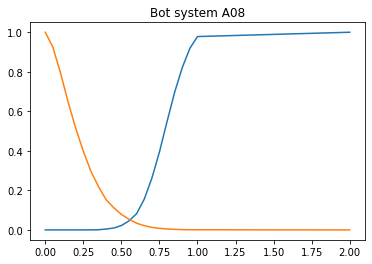

(0.05369076375937463, 0.55)


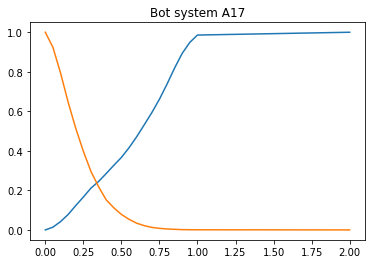

(0.24477791936198068, 0.3)


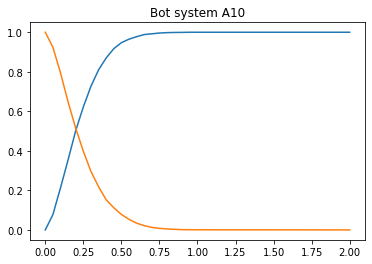

(0.5142199068036355, 0.2)


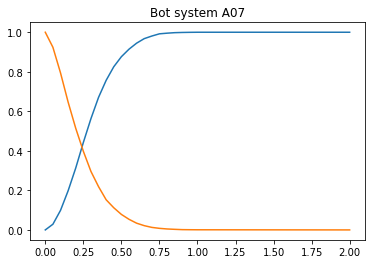

(0.4422122989095228, 0.2)


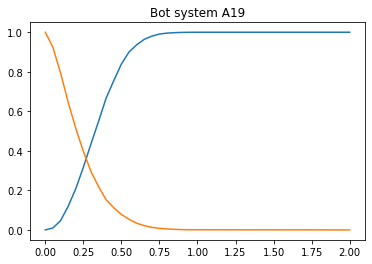

(0.39781745841637284, 0.25)


In [29]:
for b in eval_bot_systems:
    X_eval_spoof = [d['X_eval_spoof'] for d in eval_bot_features if d['bot'] == b][0]
    y_eval_spoof = [d['y_eval_spoof'] for d in eval_bot_features if d['bot'] == b][0]
    
    X_eval = np.concatenate((X_eval_bonafide, X_eval_spoof), axis=0)
    y_eval = np.concatenate((y_eval_bonafide, y_eval_spoof), axis=0)
    
    
    y_eval_hat = clf.predict_proba(X_eval)[:, 0]

    
    target_score = y_eval_hat[np.where(y_eval==0)]
    nontarget_score = y_eval_hat[np.where(y_eval==1)]

    
    [fpr, tpr, th] = roc_curve(y_eval, y_eval_hat, pos_label=0)
    fnr = 1-tpr
    
    plt.figure()
    plt.title('Bot system %s' %b)
    plt.plot(th, fnr)
    plt.plot(th, fpr)
    #plt.plot(th, np.abs(fnr-fpr))
    plt.show()

    print(compute_eer(target_score, nontarget_score))
